In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['gender_submission.csv', 'test.csv', 'train.csv']


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


fill missing values

In [8]:
train["Name"] = train["Name"].str.extract(r"([a-zA-Z]+)\.")
test["Name"] = test["Name"].str.extract(r"([a-zA-Z]+)\.")

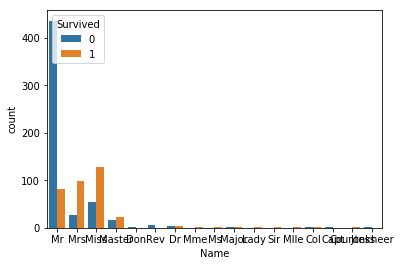

In [9]:
sns.countplot(train["Name"], hue=train["Survived"])

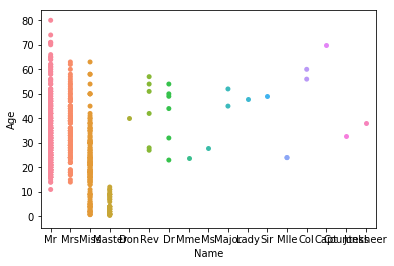

In [10]:
sns.stripplot(train["Name"], train["Age"])

In [11]:
def arrangename(name):
    if name == "Mr" or name == "Mrs" or name == "Miss" or name == "Master":
        return name
    else:
        return "Others"

In [12]:
train["Name"] = train["Name"].apply(arrangename)
test["Name"] = test["Name"].apply(arrangename)

In [13]:
train.loc[(train["Name"]=="Mr")&(train["Age"].isnull()), "Age"] = train.loc[train["Name"]=="Mr","Age"].mean()
train.loc[(train["Name"]=="Mrs")&(train["Age"].isnull()), "Age"] = train.loc[train["Name"]=="Mrs","Age"].mean()
train.loc[(train["Name"]=="Miss")&(train["Age"].isnull()), "Age"] = train.loc[train["Name"]=="Miss","Age"].mean()
train.loc[(train["Name"]=="Master")&(train["Age"].isnull()), "Age"] = train.loc[train["Name"]=="Master","Age"].mean()
train.loc[(train["Name"]=="Others")&(train["Age"].isnull()), "Age"] = train["Age"].mean()

test.loc[(test["Name"]=="Mr")&(test["Age"].isnull()), "Age"] = train.loc[train["Name"]=="Mr","Age"].mean()
test.loc[(test["Name"]=="Mrs")&(test["Age"].isnull()), "Age"] = train.loc[train["Name"]=="Mrs","Age"].mean()
test.loc[(test["Name"]=="Miss")&(test["Age"].isnull()), "Age"] = train.loc[train["Name"]=="Miss","Age"].mean()
test.loc[(test["Name"]=="Master")&(test["Age"].isnull()), "Age"] = train.loc[train["Name"]=="Master","Age"].mean()
test.loc[(test["Name"]=="Others")&(test["Age"].isnull()), "Age"] = train["Age"].mean()

In [14]:
test["Fare"].fillna(train["Fare"].mean(), inplace=True)

In [15]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
train["Cabin"] = train["Cabin"].str.extract(r"([A-Z])")
test["Cabin"] = test["Cabin"].str.extract(r"([A-Z])")

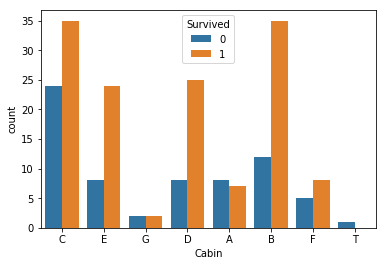

In [17]:
sns.countplot(train["Cabin"], hue=train["Survived"])

In [18]:
def cabintoint(cabin):
    if cabin == "B" or cabin == "C" or cabin == "D" or cabin == "E":
        return 1
    else:
        return 0

In [19]:
train["Cabin"] = train["Cabin"].apply(cabintoint)
test["Cabin"] = test["Cabin"].apply(cabintoint)

In [20]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
train["Embarked"].fillna("S", inplace=True)

Investigate and arrange all attributes in terms of "Survived"

In [22]:
train.drop("PassengerId", axis=1, inplace=True)

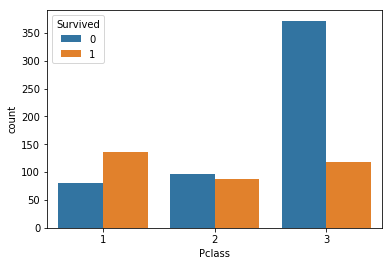

In [23]:
sns.countplot(train["Pclass"], hue=train["Survived"])

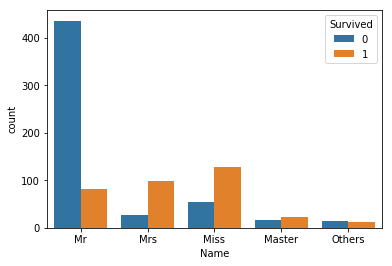

In [24]:
sns.countplot(train["Name"], hue=train["Survived"])

In [25]:
tmp = pd.get_dummies(train["Name"])
train.drop("Name", axis=1, inplace=True)
train = pd.concat((train, tmp), axis=1)
train.drop(["Others"], axis=1, inplace=True)

tmp = pd.get_dummies(test["Name"])
test.drop("Name", axis=1, inplace=True)
test = pd.concat((test, tmp), axis=1)
test.drop(["Others"], axis=1, inplace=True)

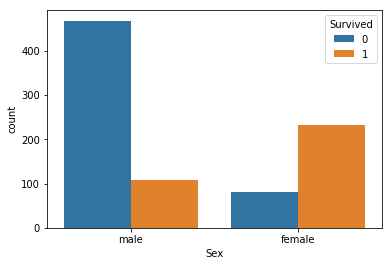

In [26]:
sns.countplot(train["Sex"], hue=train["Survived"])

In [27]:
train["Sex"].replace({"male": 0, "female": 1}, inplace=True)
test["Sex"].replace({"male": 0, "female": 1}, inplace=True)

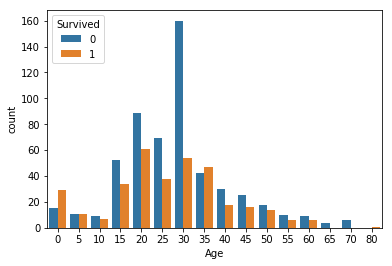

In [28]:
sns.countplot(train["Age"].apply(lambda x: int(x//5*5)), hue=train["Survived"])

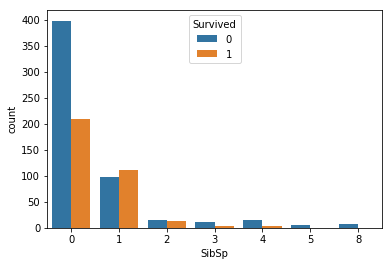

In [29]:
sns.countplot(train["SibSp"], hue=train["Survived"])

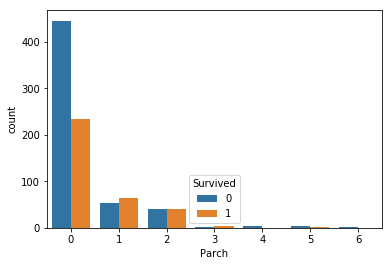

In [30]:
sns.countplot(train["Parch"], hue=train["Survived"])

In [31]:
train.drop("Ticket", axis=1, inplace=True)
test.drop("Ticket", axis=1, inplace=True)

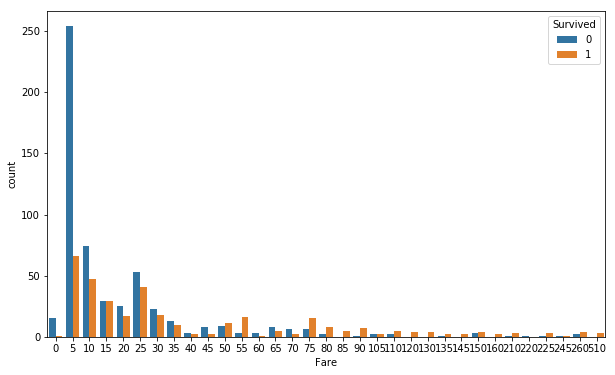

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(train["Fare"].apply(lambda x: int(x//5*5)), hue=train["Survived"])

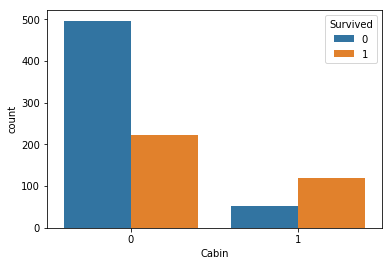

In [33]:
sns.countplot(train["Cabin"], hue=train["Survived"])

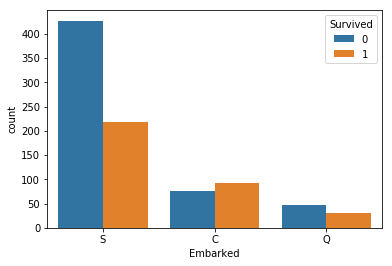

In [34]:
sns.countplot(train["Embarked"], hue=train["Survived"])

In [35]:
train.replace({"S": 0, "C": 1, "Q": 1}, inplace=True)
test.replace({"S": 0, "C": 1, "Q": 1}, inplace=True)

arrange data to put them in models

In [36]:
X_train = train.drop("Survived", axis=1)
columns = X_train.columns
y_train = train["Survived"]
Id = test["PassengerId"]
test = test.drop("PassengerId", axis=1)

In [37]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
test = std.transform(test)

train models

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [40]:
def modeling(params, estimator):
    '''
    receive hyper paramaters and a model,
    execute GridSearchCV using 5 folds and print best hyper paramaters
    print accuracy about the model using the hyper paramater by testing validation data
    return accuracy and the model
    '''
    
    grid = GridSearchCV(estimator, params, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    
    clf = grid.best_estimator_
    clf.fit(X_train, y_train)
    predict = clf.predict(X_valid)
    accuracy = accuracy_score(y_valid, predict)
    print("paramater:", grid.best_params_)
    print("accuracy:", accuracy)
    
    return accuracy, grid.best_estimator_

In [41]:
params = {"n_estimators": [5, 10, 20, 25],
         "max_depth": [3, 5, 7, 9, None],
         "max_features": ["auto", "sqrt", "log2", None]}

rfc_accuracy, rfc_clf = modeling(params, RandomForestClassifier())
importance = pd.DataFrame({"feature": columns, "importance": rfc_clf.feature_importances_})
importance.sort_values(by="importance", ascending=False)

paramater: {'max_depth': 7, 'max_features': 'auto', 'n_estimators': 20}
accuracy: 0.8435754189944135


,feature,importance
1,Sex,0.219898
10,Mr,0.207725
5,Fare,0.142745
2,Age,0.124740
0,Pclass,0.075589
3,SibSp,0.065312
6,Cabin,0.052004
9,Miss,0.037331
4,Parch,0.034286
8,Master,0.015485


In [42]:
params = {"C": [0.5, 1.0, 1.5],
         "gamma": [0.01, 0.05, 0.1],
         "probability": [True]}

svc_accuracy, svc_clf = modeling(params, SVC())

paramater: {'C': 1.0, 'gamma': 0.05, 'probability': True}
accuracy: 0.8268156424581006


In [43]:
params =  {"C": [0.1, 1, 10],
          "max_iter": [50, 100, 200]}

lr_accuracy, lr_clf = modeling(params, LogisticRegression())

paramater: {'C': 0.1, 'max_iter': 50}
accuracy: 0.8212290502793296


In [44]:
params = {"n_neighbors": [2, 3, 4, 5, 10, 15],
         "leaf_size": [20, 30, 50],
         "weights": ["uniform", "distance"],
         "algorithm": ["auto", "ball_tree", "kd_tree"]}

knc_accuracy, knc_clf = modeling(params, KNeighborsClassifier())

paramater: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 10, 'weights': 'uniform'}
accuracy: 0.8547486033519553


In [45]:
params = {}

gnb_accuracy, gnb_clf = modeling(params, GaussianNB())

paramater: {}
accuracy: 0.8324022346368715


In [46]:
params = {"C": [0.005, 0.01, 0.5, 1.0]}
    
lsvc_accuracy, lsvc_clf = modeling(params, LinearSVC())

paramater: {'C': 0.5}
accuracy: 0.8212290502793296


In [47]:
accuracy = pd.DataFrame({"model": ["RandomForestClassifier", "SVC", "LogisticRegression", "KNeighborsClassifier", "GaussianNB", "LinearSVC"],
                        "accuracy": [rfc_accuracy, svc_accuracy, lr_accuracy, knc_accuracy, gnb_accuracy, lsvc_accuracy]})
accuracy.sort_values(by="accuracy", ascending=False)

,model,accuracy
3,KNeighborsClassifier,0.854749
0,RandomForestClassifier,0.843575
4,GaussianNB,0.832402
1,SVC,0.826816
2,LogisticRegression,0.821229
5,LinearSVC,0.821229


In [48]:
knc_clf.fit(X_train, y_train)
submission_predictions = knc_clf.predict(test)
submission = pd.DataFrame({"PassengerId": Id, "Survived": submission_predictions})
submission.to_csv("submission.csv", index=False)